In [94]:
import numpy as np
import scipy as sp
import math
from math import factorial as fact
from math import gamma 
import pymc
from matplotlib import pyplot as plt
%matplotlib inline

# 問題設定

ある世帯パネルデータ。売り上げ実績58.9億円がわかっており、パネルデータによる売上高は41.2億円で実績の70%

|ラベル| 項目 | 補正前 | 補正後（売り上げ差異を補正のため一部10/7倍)|
|:---:|:---:|:---:|:---:|
|(A)|平成20年の総世帯数(千)|49973|49973|
|(B)|浸透率| 15.0% | 17.47% |
|(C)|平均購入回数| 2.50 | 3.07 |
|(D)|1回当たり平均購入個数 | 1.10| 1.10|
|(E)|1個あたり平均購入単価 | 200円 | 200円 |
|(F)|2回以上購入者比率| 50% |  

In [7]:
def f(x):
    return (1+0.4125/x)**(-x) - 0.85

In [8]:
sp.optimize.fsolve(f,1)

array([ 0.0989263])

In [155]:
M = 0.736
K = 0.6016
p = K/(M+K)
q = M/(M+K)
n = 1000
result = np.random.negative_binomial(K,p,n)
d_answer={0:0.62, 1:0.20, 2:0.1, 3:0.04, 4:0.02, 5:0.01, 6:0.01}
answer = []
for k,v in d_answer.items():
    for i in range(int(v*n)):
        answer.append(k)

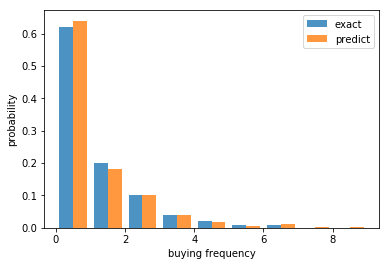

In [197]:
#plt.hist(sorted(list(result)), normed=True, alpha=0.8, rwidth=0.8, bins=np.arange(0,10,1),label='prediction')
#plt.hist(answer, normed=True, alpha=0.8, rwidth=0.8, bins=np.arange(0,10,1), label='exact')
plt.hist([answer,sorted(list(result))], normed=True, alpha=0.8, rwidth=0.8, bins=np.arange(0,10,1), label=['exact','predict'])
plt.xlabel('buying frequency')
plt.ylabel('probability')
plt.legend(loc='upper right')
plt.savefig('ndb_ex1.png')
plt.show()

In [88]:
M = 1.46
K = 0.78
p = K/(M+K)
q = M/(M+K)
result2 = np.random.negative_binomial(K,p,5240)
d_answer2={0:0.44, 1:0.19, 2:0.14, 3:0.09, 4:0.06, 5:0.03, 6:0.04}
answer2 = []
for k,v in d_answer2.items():
    for i in range(int(v*n)):
        answer2.append(k)

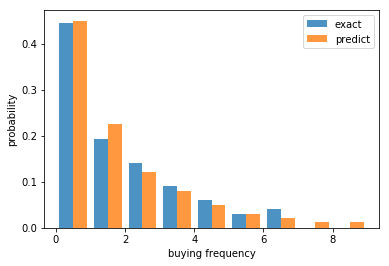

In [196]:
#plt.hist(sorted(list(result2)), normed=True, alpha=0.8, rwidth=0.8, bins=np.arange(0,10,1), label='prediction')
#plt.hist(answer2, normed=True, alpha=0.8, rwidth=0.8, bins=np.arange(0,10,1), label='exact')
plt.hist([answer2,sorted(list(result2))], normed=True, alpha=0.8, rwidth=0.8, bins=np.arange(0,10,1), label=['exact','predict'])
plt.xlabel('buying frequency')
plt.ylabel('probability')
plt.legend(loc='upper right')
plt.savefig('ndb_ex2.png')
plt.show()

In [90]:
M = 0.993
K = 0.475
p = K/(M+K)
q = M/(M+K)
result3 = np.random.negative_binomial(K,p,9480)
d_answer3={0:0.58, 1:0.20, 2:0.09, 3:0.05, 4:0.03, 5:0.02, 6:0.03}
answer3 = []
for k,v in d_answer3.items():
    for i in range(int(v*n)):
        answer3.append(k)

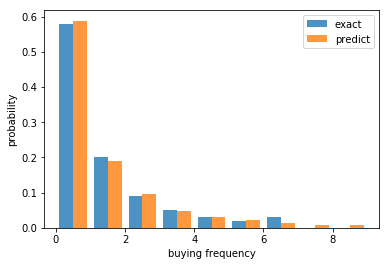

In [195]:
#plt.hist(sorted(list(result3)), normed=True, alpha=0.8, rwidth=0.8, bins=np.arange(0,10,1), label='prediction')
#plt.hist(answer3, normed=True, alpha=0.8, rwidth=0.8, bins=np.arange(0,10,1), label='exact')
plt.hist([answer3,sorted(list(result3))], normed=True, alpha=0.8, rwidth=0.8, bins=np.arange(0,10,1), label=['exact','predict'])
plt.xlabel('buying frequency')
plt.ylabel('probability')
plt.legend(loc='upper right')
plt.savefig('ndb_ex3.png')
plt.show()

In [143]:
M = 1.46
K = 0.78
S = 1.2
T = 1
p = K/(M*T+K)
q = M*T/(M*T+K)
alphas = [0.25*S, 0.19*S, 0.1*S, 0.1*S, 0.09*S, 0.08*S, 0.03*S, 0.02*S]

In [144]:
def prR(ri,R,ai,S):
    return fact(R)/(fact(ri)*fact(R-ri))*gamma(S)/(gamma(ai)*gamma(S-ai))*(gamma(ai+ri)*gamma(S-ai+R-ri))/gamma(S+R)

In [145]:
def NDB(p,q,R,K):
    return gamma(K+R)/(fact(R)*gamma(K))*(p**K)*(q**R)


In [146]:
all_com = []
for alpha in alphas:
    Rtmp=[]
    for R in range(101):
        rtmp=[]
        for ri in range(R+1):
            rtmp.append(prR(ri,R,alpha,S)*NDB(p,q,R,K))
        Rtmp.append(rtmp)
    all_com.append(Rtmp)
        

In [147]:
quater_prob = []
quater_buy = []

for com in all_com:
    tmp_buy = 0
    tmp_prob = 0
    for R in com:
        for i,r in enumerate(R):
            tmp_buy += i*r
            if i > 0:
                tmp_prob += r
                
    tmp_buy = tmp_buy/tmp_prob               
    quater_prob.append(tmp_prob)
    quater_buy.append(tmp_buy)

In [148]:
print(quater_prob)
print(quater_buy)

[0.19812673437102113, 0.15520718609570258, 0.08555022867850974, 0.08555022867850974, 0.07739582034644872, 0.06915502611371932, 0.026620923870449304, 0.017841048626564177]
[1.8422551664152522, 1.787288378702693, 1.706599763147963, 1.706599763147963, 1.6977660991486279, 1.6889589457739747, 1.6453223116204354, 1.6366750974784579]


In [130]:
M = 1.46
K = 0.78
S = 1.2
T = 4
p = K/(M*T+K)
q = M*T/(M*T+K)
alphas = [0.25*S, 0.19*S, 0.1*S, 0.1*S, 0.09*S, 0.08*S, 0.03*S, 0.02*S]

In [140]:
all_com_year = []
for alpha in alphas:
    Rtmp=[]
    for R in range(101):
        rtmp=[]
        for ri in range(R+1):
            rtmp.append(prR(ri,R,alpha,S)*NDB(p,q,R,K))
        Rtmp.append(rtmp)
    all_com_year.append(Rtmp)
        

In [141]:
year_prob = []
year_buy = []

for com in all_com_year:
    tmp_buy = 0
    tmp_prob = 0
    for R in com:
        for i,r in enumerate(R):
            tmp_buy += i*r
            if i > 0:
                tmp_prob += r
                
    tmp_buy = tmp_buy/tmp_prob               
    year_prob.append(tmp_prob)
    year_buy.append(tmp_buy)

In [142]:
print(year_prob)
print(year_buy)

[0.37883919791193155, 0.3057503035417358, 0.1766479654383652, 0.1766479654383652, 0.1606762622081913, 0.14435111569793938, 0.05712986110142941, 0.03850489346072647]
[3.853768900964433, 3.6290025353214945, 3.3059168629682514, 3.3059168629682514, 3.271081438872017, 3.2364612351108053, 3.066610752203172, 3.0332949153455715]


In [149]:
import pandas as pd
from pandas import Series, DataFrame

In [163]:
exact_quater_prob = [0.20, 0.17, 0.09, 0.08, 0.08, 0.07, 0.03, 0.02]
exact_quater_buy = [1.8,1.7,1.6,1.9,1.7,1.7,1.4,1.5]
exact_year_prob = [0.34, 0.32, 0.15, 0.17, 0.17, 0.17, 0.06, 0.03]
exact_year_buy = [3.7, 3.2, 3.0, 3.4, 2.9, 2.8, 2.4, 3.2]

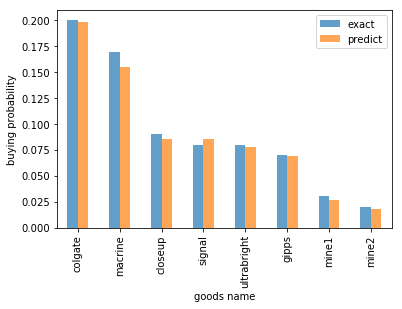

In [194]:
df_quater_prob = DataFrame({'exact':exact_quater_prob,'predict':quater_prob},\
                           index=['colgate','macrine','closeup','signal','ultrabright','gipps','mine1','mine2'])
df_quater_prob.plot(kind='bar', alpha=0.7)
plt.xlabel('goods name')
plt.ylabel('buying probability')
plt.savefig('quater_prob.png')
plt.show()

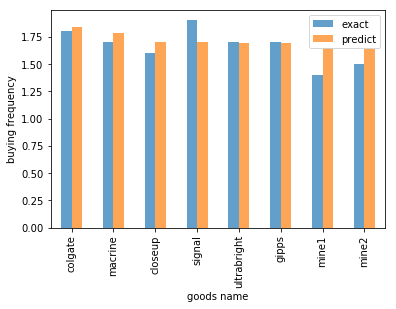

In [193]:
df_quater_buy = DataFrame({'exact':exact_quater_buy,'predict':quater_buy},\
                           index=['colgate','macrine','closeup','signal','ultrabright','gipps','mine1','mine2'])
df_quater_buy.plot(kind='bar', alpha=0.7)
plt.xlabel('goods name')
plt.ylabel('buying frequency')
plt.savefig('quater_buy.png')
plt.show()

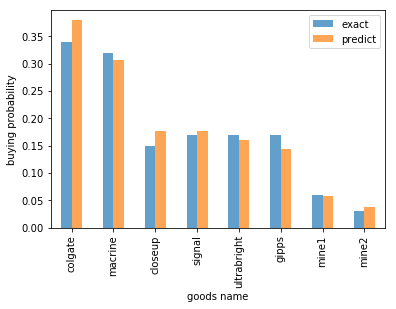

In [192]:
df_year_prob = DataFrame({'exact':exact_year_prob,'predict':year_prob},\
                           index=['colgate','macrine','closeup','signal','ultrabright','gipps','mine1','mine2'])
df_year_prob.plot(kind='bar', alpha=0.7)
plt.xlabel('goods name')
plt.ylabel('buying probability')
plt.savefig('year_prob.png')
plt.show()

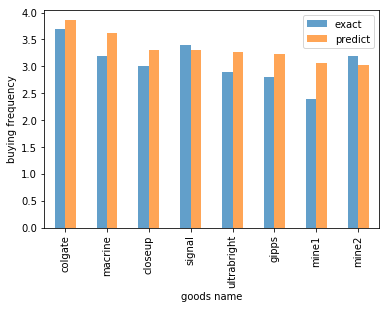

In [191]:
df_year_buy = DataFrame({'exact':exact_year_buy,'predict':year_buy},\
                           index=['colgate','macrine','closeup','signal','ultrabright','gipps','mine1','mine2'])
df_year_buy.plot(kind='bar', alpha=0.7)
plt.xlabel('goods name')
plt.ylabel('buying frequency')
plt.savefig('year_buy.png')
plt.show()